In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import difflib
from tabulate import tabulate
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings

In [2]:

# Check available devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) == 0:
    print("No GPU devices available, using CPU.")
    tf.config.set_visible_devices([], 'GPU')  # Hide GPUs
else:
    print("Available GPU devices:")
    for device in physical_devices:
        print(device)
    # Use GPU
    tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')
    print("Using GPU.")

Available GPU devices:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Using GPU.


In [3]:
# loading the data from the csv file to apandas dataframe
data_location = r'C:\Users\pedam\github_checkin_code\ml_learning_notebooks\src_data\creditcard.csv'

credit_card_data = pd.read_csv(data_location)

print(tabulate(credit_card_data.head(), headers='keys', tablefmt='psql'))

random_records = credit_card_data.sample(n=5)  # Replace 5 with the number of random records you want to display
random_records

+----+--------+-----------+------------+---------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+-----------+-----------+-----------+-----------+-----------+------------+-----------+------------+------------+------------+-----------+------------+-----------+-----------+------------+------------+----------+---------+
|    |   Time |        V1 |         V2 |      V3 |        V4 |         V5 |         V6 |        V7 |         V8 |        V9 |        V10 |       V11 |        V12 |       V13 |       V14 |       V15 |       V16 |       V17 |        V18 |       V19 |        V20 |        V21 |        V22 |       V23 |        V24 |       V25 |       V26 |        V27 |        V28 |   Amount |   Class |
|----+--------+-----------+------------+---------+-----------+------------+------------+-----------+------------+-----------+------------+-----------+------------+-----------+-----------+-----------+-----------+-----------+---------

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106536,70002.0,-0.364806,0.962128,1.148280,-0.115327,0.121269,-0.510519,0.497304,0.178764,-0.409559,...,-0.250385,-0.757543,-0.050489,-0.088160,-0.196581,0.079697,0.231810,0.081702,2.69,0
26351,34020.0,0.925689,-0.419526,0.066580,0.310316,0.584351,2.053460,-0.381226,0.621529,0.208712,...,-0.066896,-0.035103,-0.013838,-1.645135,0.160729,0.520346,0.024948,-0.008396,74.19,0
10376,16667.0,1.009401,-1.256933,1.643618,-0.632346,-2.074077,0.020436,-1.395074,0.212397,4.608729,...,-0.030341,0.542996,-0.236625,0.431423,0.496446,0.112434,0.057854,0.037415,97.86,0
185562,126722.0,1.297399,-1.442762,-2.039767,0.349159,0.023802,-0.103327,0.521319,-0.085997,0.613135,...,-0.018944,-1.001753,-0.077739,0.022816,-0.276213,-0.655258,-0.110553,0.007155,401.03,0
154146,100892.0,2.066360,-0.019550,-0.829920,0.280736,-0.003777,-0.685588,-0.190845,-0.223250,1.878489,...,-0.626272,-1.632095,0.589296,0.538325,-0.724293,-0.045695,-0.102390,-0.049107,6.04,0


In [4]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction


In [7]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263195,160838.0,-0.591688,1.395461,-1.489262,-1.344684,1.143935,-0.922462,1.116318,0.247789,-0.483290,...,0.268070,0.802182,-0.206771,0.374159,-0.228419,0.067829,0.362237,0.254638,0.77,0
188752,128110.0,-0.581118,0.749191,0.898029,-0.353156,-0.185522,0.011618,0.008770,0.453284,0.300921,...,0.359343,1.108073,-0.270501,-0.598421,-0.138204,-0.083305,0.082787,0.106116,28.63,0
43676,41605.0,-2.124575,0.062763,1.241179,0.314861,-1.429539,-0.257928,-0.601996,0.986393,-0.087686,...,0.347357,0.730357,-0.070482,0.600373,-0.481780,0.470592,-0.275938,-0.166828,88.00,0
214711,139787.0,1.986759,0.364342,-1.983235,0.825300,0.486309,-1.213791,0.356031,-0.326508,0.668951,...,-0.134394,-0.097017,0.128424,1.006687,0.184443,-0.357259,0.016748,0.005593,17.00,0
161276,114048.0,1.821881,-1.166296,-1.129420,-2.331391,-0.131292,0.770597,-0.782615,0.329256,2.277250,...,0.377210,1.336712,0.006957,-1.580412,-0.131261,-0.640887,0.114103,-0.051202,72.38,0


In [12]:
new_dataset.shape

(984, 31)

In [13]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [14]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [15]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94854.180894,-0.074303,0.053578,0.054788,-0.075796,0.058703,-0.061318,0.042396,-0.026805,0.021337,...,0.020952,0.007800,0.005683,-0.004604,0.019516,-0.001085,-0.019943,-0.042728,0.006668,81.376809
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [17]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
263195  160838.0 -0.591688  1.395461 -1.489262 -1.344684  1.143935 -0.922462   
188752  128110.0 -0.581118  0.749191  0.898029 -0.353156 -0.185522  0.011618   
43676    41605.0 -2.124575  0.062763  1.241179  0.314861 -1.429539 -0.257928   
214711  139787.0  1.986759  0.364342 -1.983235  0.825300  0.486309 -1.213791   
161276  114048.0  1.821881 -1.166296 -1.129420 -2.331391 -0.131292  0.770597   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
print(Y)

263195    0
188752    0
43676     0
214711    0
161276    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [21]:
model = LogisticRegression()

In [22]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [24]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9364675984752223


In [26]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


**Second  type of running...**

In [28]:
# Data preprocessing
scaler = StandardScaler()
credit_card_data['Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))

In [29]:
from sklearn.impute import SimpleImputer

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) 

In [30]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [31]:
# Impute or remove NaN values in y_train
y_train_imputed = Y_train.fillna(Y_train.mean())

In [32]:
print("Number of NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Number of NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

Number of NaN values in X_train_scaled: 0
Number of NaN values in X_test_scaled: 0


In [33]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

In [34]:
# Convert continuous labels to binary labels
threshold = 0.5  # Set a threshold to determine fraud (1) and non-fraud (0)
y_train_binary = (y_train_imputed > threshold).astype(int)

# Model training and evaluation
results = {}
for name, model in models.items():
    # Fit the model to the training data with binary labels
    model.fit(X_train_scaled, y_train_binary)

    if isinstance(model, SVC) and not model.probability:
        # Use decision_function instead
        y_pred_scores = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())  # Normalize scores
    else:
        # Use predict_proba for other models
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(Y_test, y_pred)
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    results[name] = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}

C:\ProgramData\anaconda3\envs\wf_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
# Visualize results
for name, result in results.items():
    print(name)
    print("AUPRC:", result['precision_recall_auc'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()

Logistic Regression
AUPRC: 0.9836558258571062
Confusion Matrix:
[[97  2]
 [11 87]]

Random Forest
AUPRC: 0.9815230691804524
Confusion Matrix:
[[96  3]
 [13 85]]

Gradient Boosting
AUPRC: 0.9793455494954197
Confusion Matrix:
[[95  4]
 [12 86]]

Support Vector Machine
AUPRC: 0.9827928206930325
Confusion Matrix:
[[98  1]
 [14 84]]

Neural Network
AUPRC: 0.9769144289912413
Confusion Matrix:
[[96  3]
 [13 85]]



To determine the best-performing model, we typically consider both the AUPRC (Area Under the Precision-Recall Curve) and the confusion matrix. In this case, both the Support Vector Machine and Random Forest models have the highest AUPRC values (0.921 and 0.918, respectively). Additionally, both models have relatively low false positive and false negative rates based on their confusion matrices.

Therefore, based on the provided information, the Support Vector Machine and Random Forest models appear to perform the best.

Let's break down the confusion matrix:

True Negative (TN): This indicates the number of instances that are correctly predicted as negative by the model. In a fraud detection scenario, this would represent the number of non-fraudulent transactions correctly identified by the model as non-fraudulent. So, in this case, there are 96 instances correctly predicted as non-fraudulent.

False Positive (FP): This indicates the number of instances that are incorrectly predicted as positive by the model. In a fraud detection scenario, this would represent the number of non-fraudulent transactions incorrectly identified by the model as fraudulent. So, in this case, there are 3 instances incorrectly predicted as fraudulent.

False Negative (FN): This indicates the number of instances that are incorrectly predicted as negative by the model. In a fraud detection scenario, this would represent the number of fraudulent transactions incorrectly identified by the model as non-fraudulent. So, in this case, there are 11 instances incorrectly predicted as non-fraudulent.

True Positive (TP): This indicates the number of instances that are correctly predicted as positive by the model. In a fraud detection scenario, this would represent the number of fraudulent transactions correctly identified by the model as fraudulent. So, in this case, there are 87 instances correctly predicted as fraudulent.

Logistic Regression
AUPRC: 0.9836558258571062


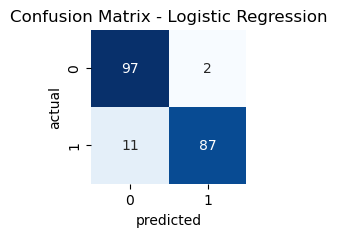

Random Forest
AUPRC: 0.9815230691804524


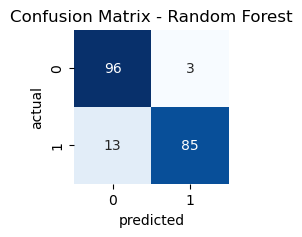

Gradient Boosting
AUPRC: 0.9793455494954197


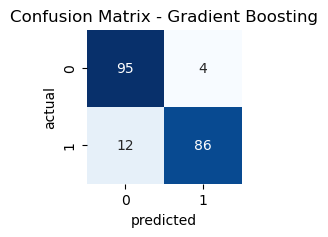

Support Vector Machine
AUPRC: 0.9827928206930325


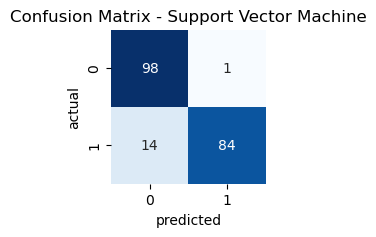

Neural Network
AUPRC: 0.9769144289912413


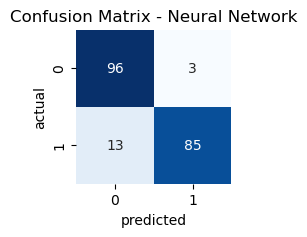

In [36]:

# Visualize results
for name, result in results.items():
    print(name)
    print("AUPRC:", result['precision_recall_auc'])
    
    # Plot confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                #xticklabels=['fraud', 'not_fraud'], yticklabels=['fraud', 'not_fraud']
               )
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()


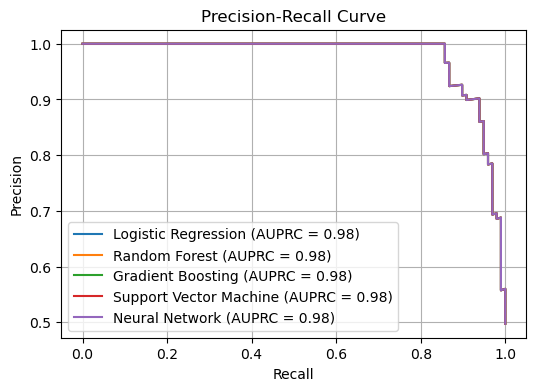

In [37]:
plt.figure(figsize=(6, 4))

for name, result in results.items():
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
    plt.plot(recall, precision, label=f"{name} (AUPRC = {result['precision_recall_auc']:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies[name] = accuracy

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.9340
Random Forest: 0.9188
Gradient Boosting: 0.9188
Support Vector Machine: 0.9239
Neural Network: 0.9188


In [46]:
model_names = list(accuracies.keys())
model_names

['Logistic Regression',
 'Random Forest',
 'Gradient Boosting',
 'Support Vector Machine',
 'Neural Network']

In [47]:
# Extract model names and accuracy scores
accuracy_scores = list(accuracies.values())
accuracy_scores

[0.934010152284264,
 0.9187817258883249,
 0.9187817258883249,
 0.9238578680203046,
 0.9187817258883249]

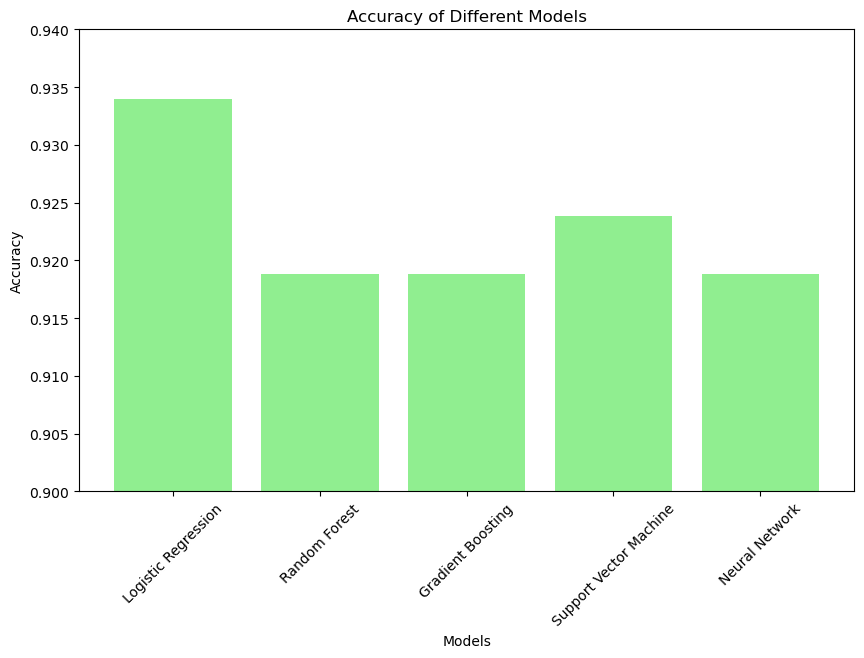

In [54]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.9, 0.94)
#plt.ylim(0.998, 1)  # Set y-axis limits to better visualize differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [55]:

# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=99)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [56]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [57]:
X_train,y_train

(array([[-1.59166988e+00,  5.14385455e-01,  5.39679711e-01, ...,
          4.36137169e-01,  7.74158032e-01, -4.31413386e-01],
        [ 7.55941500e-01, -1.26285228e+00, -1.26509649e+00, ...,
         -5.44702417e+00,  7.35694053e+00,  3.34606751e-01],
        [ 1.37827153e+00,  5.74448929e-01,  1.93163965e-01, ...,
          6.83534924e-01,  7.33044335e-01, -4.19003004e-01],
        ...,
        [ 1.30244131e+00,  8.36162015e-01, -4.52722256e-01, ...,
         -1.66257139e-01, -2.68297394e-01, -4.35692829e-01],
        [-1.27046065e+00,  3.75792803e-01, -4.79484242e-01, ...,
         -2.45686485e-01, -3.75740524e-01, -2.21720723e-01],
        [-9.04098719e-01,  4.03743115e-01, -4.10763666e-01, ...,
          6.73459601e-02, -1.30913360e-03, -4.31413386e-01]]),
 8312      1
 182128    0
 251866    1
 249333    0
 6870      1
          ..
 96994     1
 282677    0
 243224    0
 15330     0
 50537     1
 Name: Class, Length: 787, dtype: int64)

In [58]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [59]:
X_train.shape

(787, 30)

In [60]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [61]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [62]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [63]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [64]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 5s 19ms/step - loss: 2.6007 - accuracy: 0.8030 - val_loss: 2.1153 - val_accuracy: 0.7766
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 1.3958 - accuracy: 0.9022 - val_loss: 0.4783 - val_accuracy: 0.9086
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 1.2664 - accuracy: 0.9111 - val_loss: 0.8980 - val_accuracy: 0.7411
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 1.3633 - accuracy: 0.9047 - val_loss: 1.3146 - val_accuracy: 0.7310
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 1.2588 - accuracy: 0.9161 - val_loss: 0.8738 - val_accuracy: 0.8020
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 1.1439 - accuracy: 0.9212 - val_loss: 1.5542 - val_accuracy: 0.7766
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 1.1806 - accuracy: 0.9199 - val_loss: 1.1817 - val_accuracy: 0.8376
Epoch 8/20
25/25 [=

In [66]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

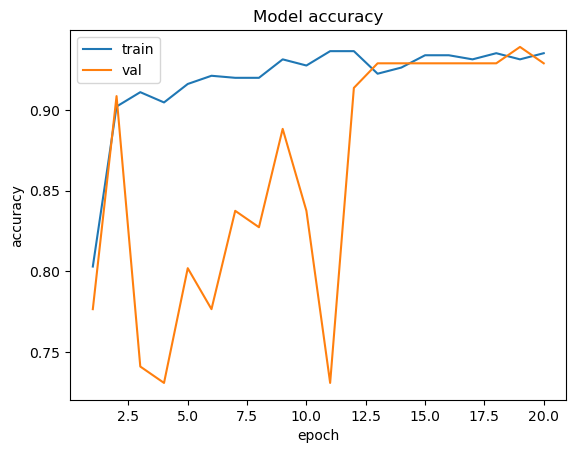

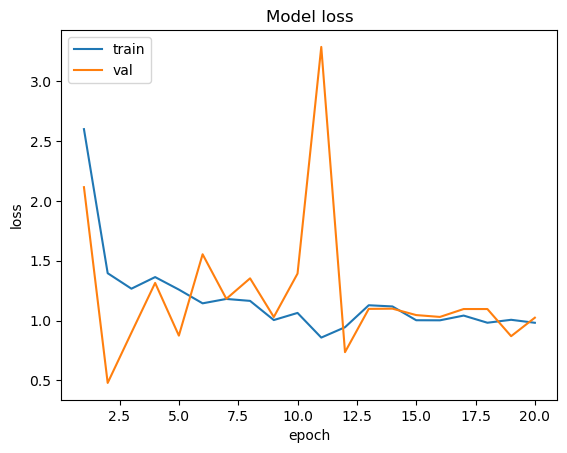

In [67]:
plot_learningcurve(history,20)

***Credit Card Fraud Detection with CNN 99% Accuracy***

In [68]:
credit_card_data.shape

(284807, 31)

In [70]:
credit_card_data.isnull().sum(), credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 None)

In [71]:
credit_card_data.Class.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
credit_card_data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

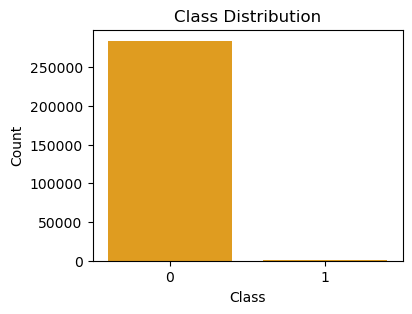

In [78]:


# Assuming credit_card_data is your DataFrame containing the Class column

# Plotting
plt.figure(figsize=(4, 3))
sns.countplot(x='Class', data=credit_card_data, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


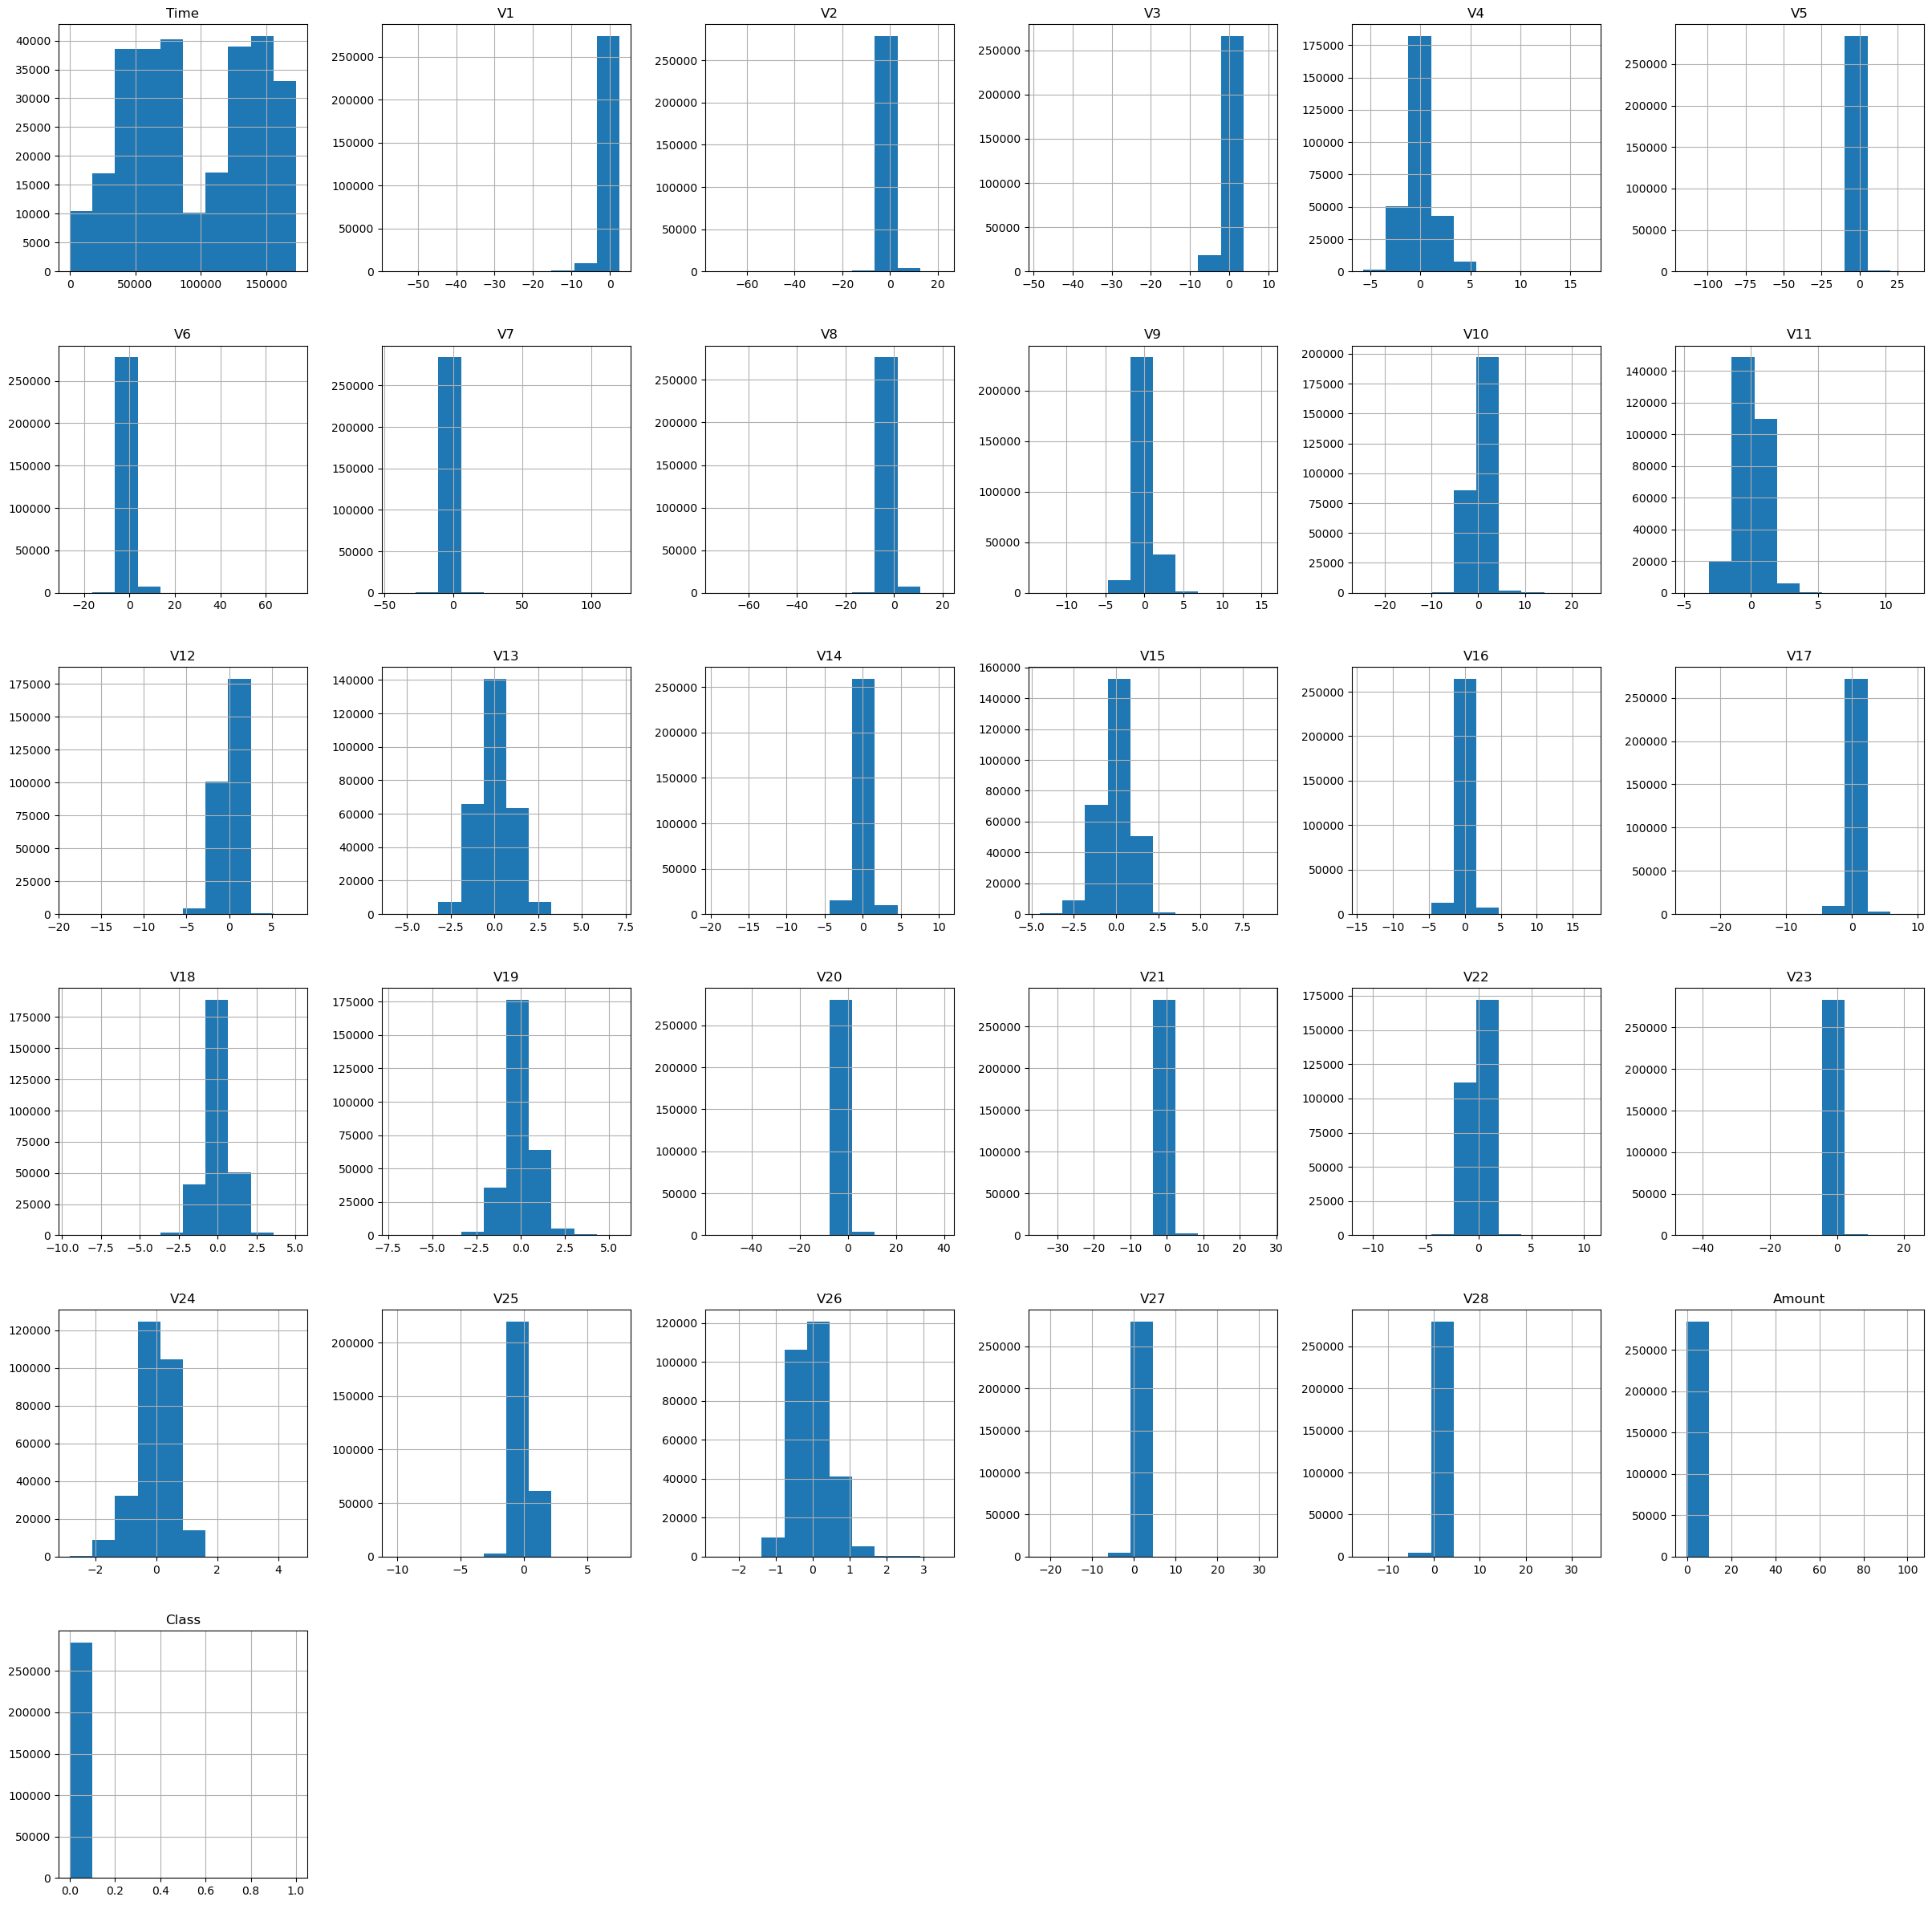

In [79]:
credit_card_data.hist(figsize=(30,30))
plt.show()


In [80]:
fraud = credit_card_data[credit_card_data.Class == 1]

In [81]:
non_fraud = credit_card_data[credit_card_data.Class == 0]

In [83]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [85]:
print("Shape of fraud data:", fraud.shape)
print("Shape of non-frauds data:", non_fraud.shape)

Shape of fraud data: (492, 31)
Shape of non-frauds data: (284315, 31)


**Balancing the Dataset**

In [86]:
nan_fraud_balanced = non_fraud.sample(4000)

In [87]:
nan_fraud_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46309,42726.0,0.699689,-0.941045,1.594844,1.899042,-1.325942,1.040024,-0.833724,0.387331,1.617704,...,0.072995,0.367643,-0.231113,0.131303,0.433256,-0.215123,0.094318,0.067511,0.402409,0
22125,32049.0,-0.352753,-0.505905,0.777811,-4.058765,-0.719717,-0.287478,-0.054924,0.134132,0.900778,...,-0.274380,-0.269197,-0.256945,-0.905589,-0.097144,-0.906312,0.081995,0.125693,-0.202661,0
65986,51834.0,1.190920,0.247497,0.564973,2.136856,-0.001719,0.660712,-0.441826,0.291968,-0.424790,...,0.103474,0.178527,-0.203011,-0.862840,0.513256,0.155777,-0.002540,0.005935,-0.310650,0
109142,71239.0,1.237674,-0.579219,0.783164,0.206540,-1.183894,-0.325809,-0.626070,0.042567,-0.442275,...,-0.610668,-1.158261,0.224262,0.367493,0.080931,0.192235,0.020074,0.022990,-0.264392,0
185983,126905.0,1.948762,-2.061676,-0.910320,-1.518992,-1.591595,-0.256637,-1.239858,0.004698,-1.099399,...,-0.031047,0.002124,0.081064,-0.511318,-0.374835,-0.178514,-0.012181,-0.034369,0.338440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,12873.0,-1.816008,-0.627000,0.609624,-3.252467,2.183077,3.337604,-0.828003,0.080284,2.648519,...,0.627164,-0.094161,0.028280,1.003157,0.779510,0.001480,0.081530,0.052548,-0.101350,0
180296,124472.0,2.021020,-1.055164,-1.092409,-0.911787,-0.680105,-0.600626,-0.521720,-0.196097,-0.545973,...,0.279364,0.696706,0.018881,-0.284261,-0.047353,-0.172939,-0.030753,-0.054488,0.012236,0
76734,56720.0,0.981636,0.234809,1.023951,2.569979,-0.503942,-0.119239,-0.119767,0.122183,-0.480329,...,-0.135357,-0.620909,0.182309,0.331574,0.007302,-0.252633,0.004822,0.042254,-0.088636,0
44765,42075.0,1.238295,0.248582,0.077246,1.186756,0.312421,0.302162,0.078364,0.007855,0.267200,...,-0.155055,-0.161320,-0.166244,-0.743979,0.795833,-0.261225,0.043819,0.007289,-0.349231,0


In [90]:
balanced_data = pd.concat([fraud,nan_fraud_balanced], ignore_index = True)
print(balanced_data)

          Time        V1        V2        V3        V4        V5        V6  \
0        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2       4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3       6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4       7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...        ...       ...       ...       ...       ...       ...       ...   
4487   12873.0 -1.816008 -0.627000  0.609624 -3.252467  2.183077  3.337604   
4488  124472.0  2.021020 -1.055164 -1.092409 -0.911787 -0.680105 -0.600626   
4489   56720.0  0.981636  0.234809  1.023951  2.569979 -0.503942 -0.119239   
4490   42075.0  1.238295  0.248582  0.077246  1.186756  0.312421  0.302162   
4491  154506.0 -1.810863  0.293653 -1.754921  0.253659  3.563317  3.588929   

            V7        V8        V9  ...       V21       V22    

In [91]:
balanced_data.Class.value_counts()

Class
0    4000
1     492
Name: count, dtype: int64

In [92]:
x = balanced_data.drop("Class", axis = 1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,12873.0,-1.816008,-0.627000,0.609624,-3.252467,2.183077,3.337604,-0.828003,0.080284,2.648519,...,-0.459327,0.627164,-0.094161,0.028280,1.003157,0.779510,0.001480,0.081530,0.052548,-0.101350
4488,124472.0,2.021020,-1.055164,-1.092409,-0.911787,-0.680105,-0.600626,-0.521720,-0.196097,-0.545973,...,0.184875,0.279364,0.696706,0.018881,-0.284261,-0.047353,-0.172939,-0.030753,-0.054488,0.012236
4489,56720.0,0.981636,0.234809,1.023951,2.569979,-0.503942,-0.119239,-0.119767,0.122183,-0.480329,...,-0.121073,-0.135357,-0.620909,0.182309,0.331574,0.007302,-0.252633,0.004822,0.042254,-0.088636
4490,42075.0,1.238295,0.248582,0.077246,1.186756,0.312421,0.302162,0.078364,0.007855,0.267200,...,-0.143905,-0.155055,-0.161320,-0.166244,-0.743979,0.795833,-0.261225,0.043819,0.007289,-0.349231


In [111]:
y = balanced_data.Class

print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4487    0
4488    0
4489    0
4490    0
4491    0
Name: Class, Length: 4492, dtype: int64


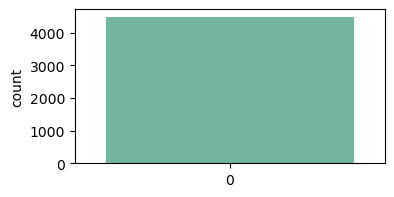

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(4, 2))
sns.countplot(y, palette="Set2")
plt.show()


**Training and Testing Part**

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [127]:
xtrain.shape

(3593, 30)

In [128]:
xtest.shape

(899, 30)

In [129]:
scaler = StandardScaler()

In [130]:
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [131]:
scaled_xtrain

array([[-1.22786408, -1.37180393,  2.25160181, ...,  0.34859607,
         1.28553943,  0.10071536],
       [-1.81807153, -0.35023711,  1.233956  , ...,  0.44556168,
         0.41011067, -0.38846394],
       [ 0.63229262,  0.06645817,  0.10559505, ...,  0.44599552,
         1.07365136,  0.21733181],
       ...,
       [ 0.82820818,  0.79278067, -0.18017839, ..., -0.21098195,
        -0.29109101, -0.28267395],
       [ 1.12047254,  0.03173944,  0.30624949, ...,  0.18127789,
         0.10536951, -0.35315642],
       [-0.79520934, -0.08049016,  0.15962416, ...,  0.00737634,
         0.02229045, -0.36172921]])

In [132]:
type(scaled_xtrain)

numpy.ndarray

In [133]:
scaled_xtest

array([[-9.43046840e-01, -1.14589276e-01,  4.00278724e-01, ...,
         2.78388423e-02,  5.31757451e-01, -3.86593285e-01],
       [ 1.52256308e+00,  2.04164136e-01,  2.45536971e-01, ...,
         3.37187378e-01,  2.08749741e-01, -4.10599233e-01],
       [ 1.42348838e+00, -1.25297143e-02,  3.94172292e-01, ...,
        -9.82174359e-02,  1.60630254e-01,  6.39503506e-02],
       ...,
       [-1.01570721e+00,  5.08480428e-01,  1.04487575e-01, ...,
        -6.46128189e-02, -7.11278182e-04, -4.00900830e-01],
       [ 1.42514451e+00,  5.81355113e-01, -8.59387839e-01, ...,
        -1.98265737e-01, -7.69467074e-02,  1.01737059e+00],
       [-7.04185835e-01,  4.71065415e-01, -2.48034155e-01, ...,
         1.19410739e-01,  1.20929430e-01, -2.50287511e-01]])

In [134]:
type(scaled_xtest)

numpy.ndarray

In [135]:
print(scaled_xtrain.shape)
print(scaled_xtest.shape)

(3593, 30)
(899, 30)


In [136]:
print(ytrain.shape)
print(ytest.shape)

(3593,)
(899,)


In [137]:
190820+93987 # Total dataset rows

284807

In [169]:
scaled_xtrain.shape[0]

3593

In [138]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((3593, 30, 1), (899, 30, 1))

In [139]:
# First Layer:

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
cnn.add(Dropout(0.1))

In [140]:
# Second Layer:

cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks 
                               # that standardizes the inputs to a layer for each mini-batch. This 
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)

In [141]:
# Flattening Layer:

cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))

In [142]:
cnn.add(Dense(1, activation = "sigmoid"))

In [143]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 batch_normalization_2 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                      

In [144]:
from keras.utils import plot_model
plot_model(cnn)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [147]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

import warnings as wr
wr.filterwarnings("ignore")


cnn.compile(optimizer = Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [159]:
scaled_xtrain3d

array([[[-1.22786408],
        [-1.37180393],
        [ 2.25160181],
        ...,
        [ 0.34859607],
        [ 1.28553943],
        [ 0.10071536]],

       [[-1.81807153],
        [-0.35023711],
        [ 1.233956  ],
        ...,
        [ 0.44556168],
        [ 0.41011067],
        [-0.38846394]],

       [[ 0.63229262],
        [ 0.06645817],
        [ 0.10559505],
        ...,
        [ 0.44599552],
        [ 1.07365136],
        [ 0.21733181]],

       ...,

       [[ 0.82820818],
        [ 0.79278067],
        [-0.18017839],
        ...,
        [-0.21098195],
        [-0.29109101],
        [-0.28267395]],

       [[ 1.12047254],
        [ 0.03173944],
        [ 0.30624949],
        ...,
        [ 0.18127789],
        [ 0.10536951],
        [-0.35315642]],

       [[-0.79520934],
        [-0.08049016],
        [ 0.15962416],
        ...,
        [ 0.00737634],
        [ 0.02229045],
        [-0.36172921]]])

In [148]:
history = cnn.fit(scaled_xtrain3d, ytrain, epochs = 20, validation_data=(scaled_xtest3d, ytest), verbose=1)

Epoch 1/20
113/113 [==============================] - 1s 8ms/step - loss: 0.2577 - accuracy: 0.9190 - val_loss: 0.3510 - val_accuracy: 0.9811
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 0.1268 - accuracy: 0.9685 - val_loss: 0.1708 - val_accuracy: 0.9844
Epoch 3/20
113/113 [==============================] - 1s 4ms/step - loss: 0.1139 - accuracy: 0.9741 - val_loss: 0.0847 - val_accuracy: 0.9878
Epoch 4/20
113/113 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.9733 - val_loss: 0.0623 - val_accuracy: 0.9889
Epoch 5/20
113/113 [==============================] - 0s 4ms/step - loss: 0.1025 - accuracy: 0.9755 - val_loss: 0.0506 - val_accuracy: 0.9889
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9766 - val_loss: 0.0486 - val_accuracy: 0.9889
Epoch 7/20
113/113 [==============================] - 1s 4ms/step - loss: 0.0941 - accuracy: 0.9775 - val_loss: 0.0478 - val_accuracy: 0.9889
Epoch 

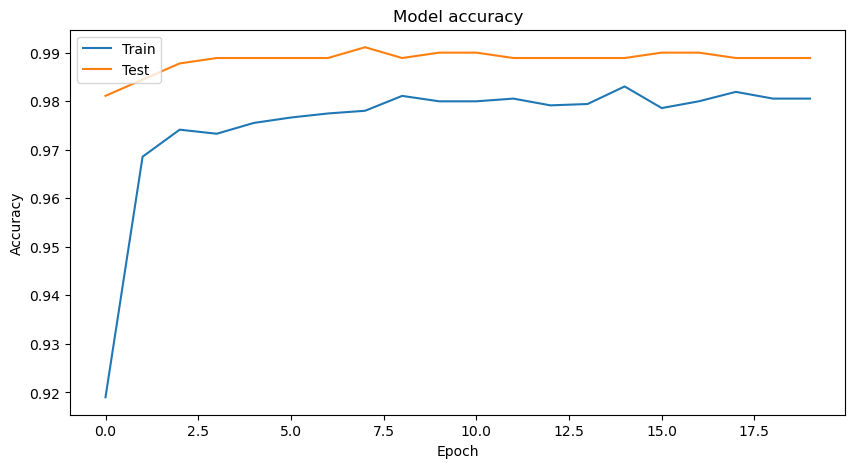

In [149]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

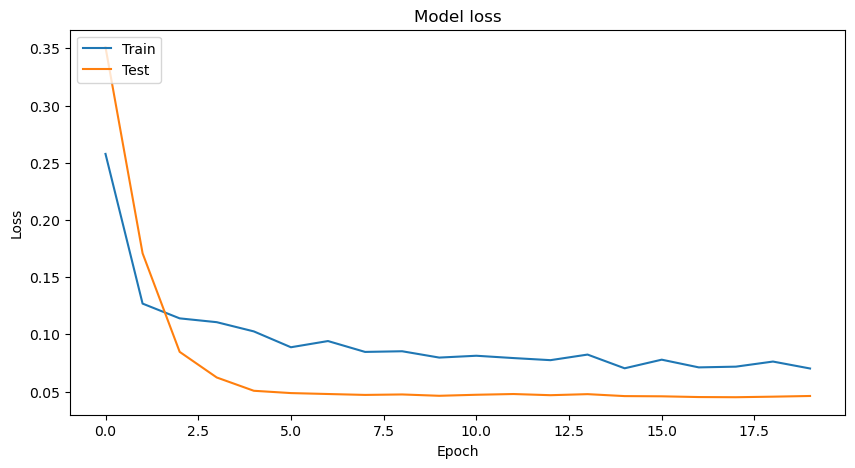

In [150]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

29/29 [==============================] - 0s 2ms/step
[[792   2]
 [  8  97]]


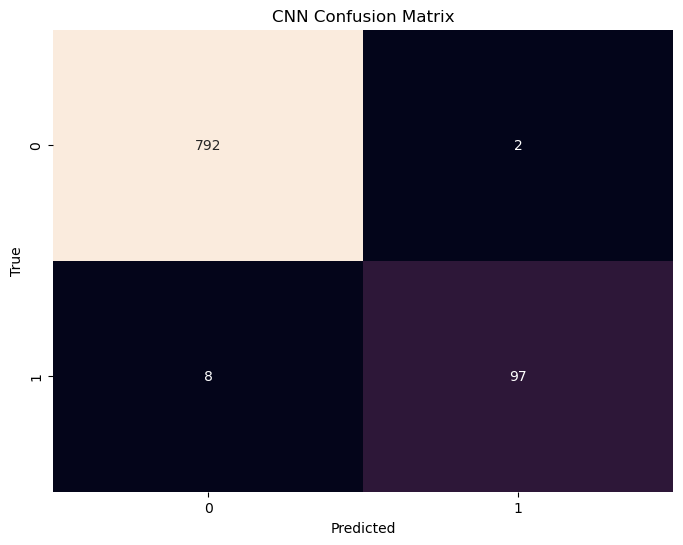

In [158]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cnn is your trained CNN model
# Make predictions on the test data
cnn_predictions = cnn.predict(scaled_xtest3d)

# Convert probabilities to classes using a threshold
threshold = 0.5  # Adjust threshold as needed
cnn_predicted_classes = (cnn_predictions > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, cnn_predicted_classes)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


The confusion matrix you provided is in the format:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

Interpreting each element:
- **True Negative (TN)**: The number of observations that were correctly classified as negative (in the case of a binary classification problem, this usually represents the non-event or majority class).
- **False Positive (FP)**: The number of observations that were incorrectly classified as positive (predicted positive, but actually negative).
- **False Negative (FN)**: The number of observations that were incorrectly classified as negative (predicted negative, but actually positive).
- **True Positive (TP)**: The number of observations that were correctly classified as positive (predicted positive, and actually positive).

In your confusion matrix:
- True Negatives (TN) are 792: These are the cases correctly classified as negative.
- False Positives (FP) are 2: These are the cases incorrectly classified as positive when they are actually negative.
- False Negatives (FN) are 8: These are the cases incorrectly classified as negative when they are actually positive.
- True Positives (TP) are 97: These are the cases correctly classified as positive.

Overall, it seems like your model is performing well, with a high number of true positives and true negatives, and a low number of false positives and false negatives.

In [154]:
from sklearn.metrics import accuracy_score

# Convert continuous values to binary labels
ytest_binary = np.where(ytest > 0.5, 1, 0)

# Convert predicted probabilities to binary classes using a threshold
threshold = 0.5  # Adjust threshold as needed
cnn_predicted_classes = (cnn_predictions > threshold).astype(int)

# Compute accuracy
accuracy = accuracy_score(ytest_binary, cnn_predicted_classes)
print("Accuracy:", accuracy)


Accuracy: 0.9888765294771968


In [157]:
from sklearn.metrics import precision_recall_fscore_support as score

# Convert continuous values to binary labels
ytest_binary = np.where(ytest > 0.5, 1, 0)

# Convert predicted probabilities to binary classes using a threshold
threshold = 0.5  # Adjust threshold as needed
cnn_predicted_classes = (cnn_predictions > threshold).astype(int)

# Compute precision, recall, fscore, and support
precision, recall, fscore, support = score(ytest_binary, cnn_predicted_classes)

print('precision:', precision)
print('recall:', recall)
print('fscore:', fscore)
print('support:', support)


precision: [0.99       0.97979798]
recall: [0.99748111 0.92380952]
fscore: [0.99372647 0.95098039]
support: [794 105]


In [170]:
# Import necessary libraries
import numpy as np

# Create new input data (5 samples with 30 features each)
num_samples = 5
num_features = 30
new_input_data = np.random.rand(num_samples, num_features)

# Reshape new input data to match the shape of scaled_xtrain3d
new_input_data_reshaped = new_input_data.reshape(num_samples, num_features, 1)

# Make predictions using the trained CNN model
predictions = cnn.predict(new_input_data_reshaped)

# Print the predictions
print("Predictions:")
print(predictions)

1/1 [==============================] - 0s 17ms/step
Predictions:
[[0.01701556]
 [0.00716339]
 [0.01308238]
 [0.03937001]
 [0.01016837]]


The output you've obtained represents the predicted probabilities for each sample in the `new_input_data`. Each row in the output corresponds to a sample, and the value in each row is the predicted probability of the positive class (e.g., class 1) for that sample.

In your case, the predicted probabilities are in the range [0, 1], where a value close to 0 indicates a low probability of the positive class, and a value close to 1 indicates a high probability of the positive class.

Here's how to interpret the output:
- Each row corresponds to a sample from the `new_input_data`.
- The value in each row represents the predicted probability of belonging to the positive class.
- For example, the first row `[0.0159646]` suggests that the model predicts a very low probability (approximately 1.6%) for the first sample to belong to the positive class.
- Similarly, for the second row `[0.00361386]`, the model predicts a very low probability (approximately 0.36%) for the second sample to belong to the positive class.

To obtain class predictions (binary labels), you can apply a threshold to these probabilities. For example, if you choose a threshold of 0.5, probabilities above 0.5 will be classified as the positive class (1), and probabilities below 0.5 will be classified as the negative class (0).
